In [31]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [33]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [34]:
df.isnull().mean() * 100

,0
Survived,0.00000
Age,19.86532
Fare,0.00000


In [35]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [37]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [39]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [40]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [41]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

<ipython-input-41-c2348534f728>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
<ipython-input-41-c2348534f728>:2

In [42]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([22.  , 28.  , 23.  ,  0.67, 37.  ,  5.  , 57.  , 25.  , 21.  ,
       20.  , 26.  , 24.  , 21.  , 45.  ,  9.  , 54.  , 54.  , 24.  ,
       34.  ,  0.83, 27.  , 28.  , 36.  , 16.  , 40.  , 70.5 , 24.  ,
       18.  , 30.  , 19.  , 30.  , 59.  , 18.  ,  0.75, 25.  , 27.  ,
       24.  , 34.  , 25.  , 23.  , 27.  , 61.  , 60.  , 32.5 , 27.  ,
        3.  , 22.  , 32.  , 30.5 ,  9.  , 26.  , 23.  , 50.  , 57.  ,
       41.  , 18.  , 30.  , 22.  , 23.  , 23.5 , 40.  , 42.  , 17.  ,
       27.  , 18.  , 19.  , 29.  , 60.  , 52.  , 36.  , 52.  , 51.  ,
       27.  , 17.  , 30.  , 39.  , 40.  , 30.  , 25.  , 47.  , 47.  ,
       50.  , 32.  , 54.  , 54.  , 21.  , 46.  , 42.  , 44.  , 16.  ,
       43.  , 24.  , 27.  , 30.  , 18.  ,  8.  , 35.  ,  0.75, 30.  ,
       51.  , 34.  , 22.  , 36.  , 22.  , 30.  , 63.  ,  6.  , 30.  ,
       28.  ,  2.  , 19.  , 50.  , 26.  , 62.  , 18.  , 17.  , 56.  ,
       35.  , 11.  , 26.  , 45.  , 14.5 , 39.  , 27.  ,  9.  , 32.  ,
       40.  , 25.  ,

In [43]:
X_train['Age'].isnull().sum()

148

In [44]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,45.0
493,71.0,49.5042,71.0
527,NaN,221.7792,2.0


<ipython-input-45-a4e9b458bbaf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
<ipython-input-45-a4e9b458bbaf>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)


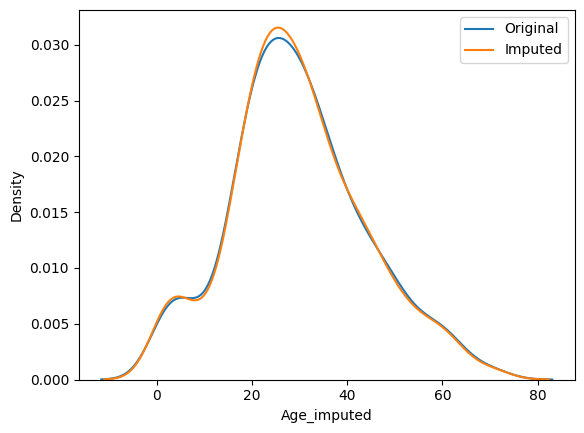

In [45]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [46]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  202.4128904042019


In [47]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,44.003516
Age,71.512440,204.349513,204.349513
Age_imputed,44.003516,204.349513,202.412890


<Axes: >

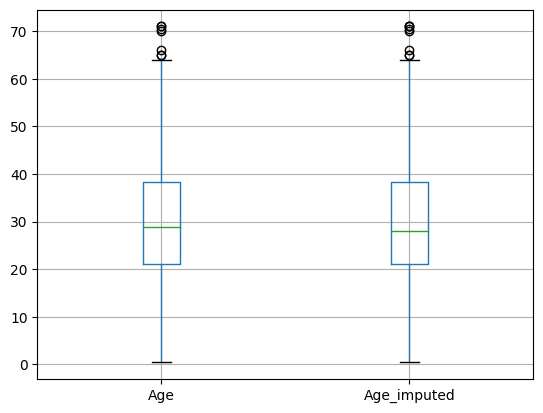

In [48]:
X_train[['Age', 'Age_imputed']].boxplot()

the above techniques is nice but eg you have fare 1000 the radom select 23 and when you have fare 1000 it genrate different age so it may be distrub

In [50]:
# Define 'observation' as a specific row from X_train, e.g., the first row
observation = X_train.iloc[0]  # or specify any other row index
sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))


for categorical data

In [52]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [54]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [55]:
data.isnull().mean() * 100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


In [56]:
X = data
y = data['SalePrice']

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [58]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [ ]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
989,NaN,TA,197000,TA,NaN
517,TA,TA,265000,TA,TA
910,NaN,TA,154300,TA,NaN
208,Gd,TA,277000,TA,Gd
340,NaN,TA,202900,TA,NaN


In [59]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

<ipython-input-59-f5eeca8d3074>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
<ipyt

In [60]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [61]:
temp

,original,imputed
TA,0.951043,0.948630
Fa,0.037171,0.039384
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [62]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.646465
TA,0.412439,0.539843
Fa,0.040917,0.056117
Po,0.027823,0.037037
Ex,0.024550,0.031425


<ipython-input-63-1d278de3936c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
<ipython-input-63-1d278de3936c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] =

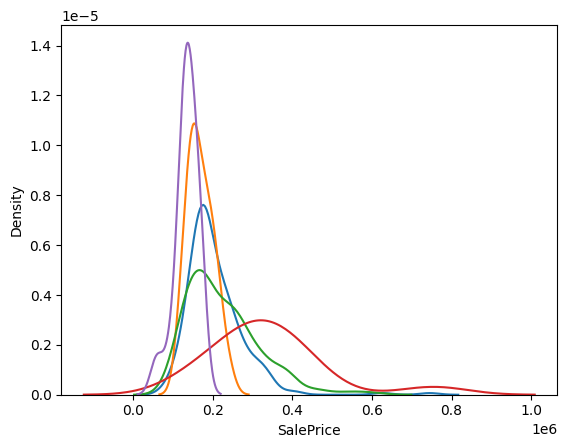

In [63]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

<ipython-input-64-e022f194d9d8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
<ipython-input-64-e022f194d9d8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['Firepla

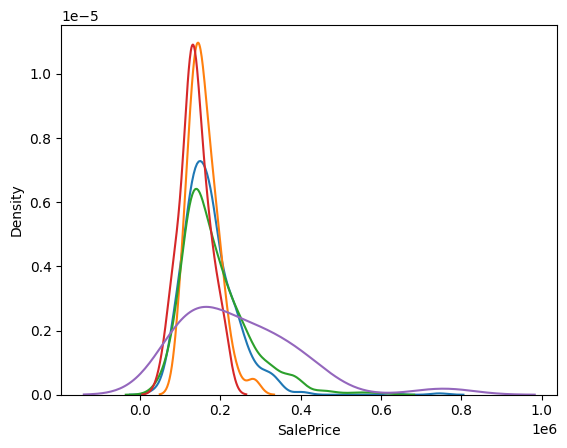

In [64]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()